In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1,"../")

In [7]:
from __future__ import print_function
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
test = np.load("../data/fashion_test.npy")
train = np.load("../data/fashion_train.npy")

In [46]:
dataset = np.load("../data/fashion_train.npy")
X,y=np.hsplit(dataset, [-1])

data = pd.DataFrame(dataset)
X = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [10]:
# initializing the pca
# Set n_components as 784 dimensions
pca = decomposition.PCA(n_components = 784)
# Fit on training data
pca_784 = pca.fit_transform(X)
#percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
var_ratios = np.cumsum(pca.explained_variance_ratio_)

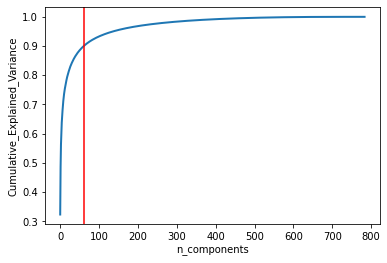

In [12]:
# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
plt.plot(var_ratios, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.axvline(x=62, c='r')
plt.show()

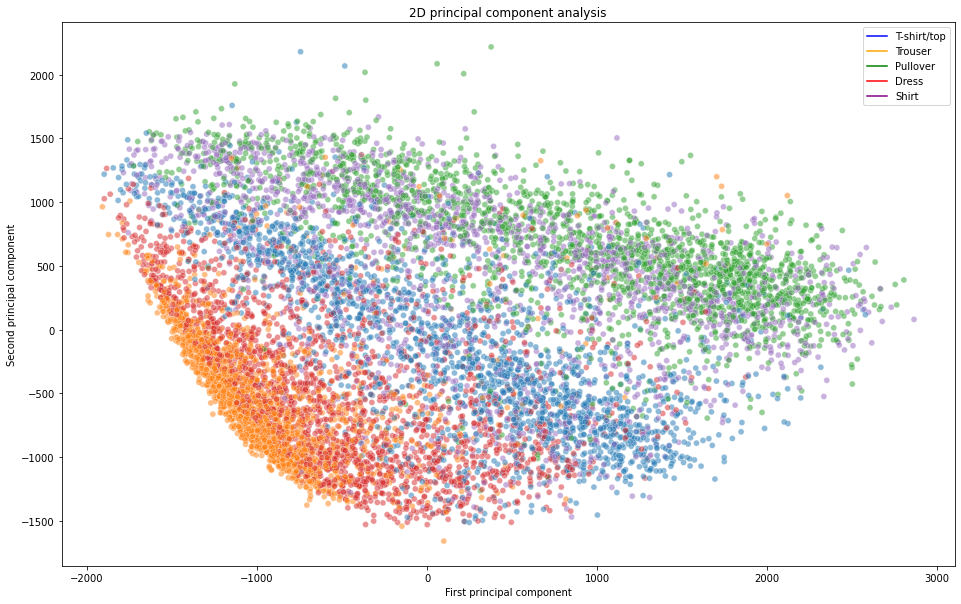

In [69]:
from matplotlib.lines import Line2D

plt.figure(figsize=(16,10))

a = Line2D([], [], color="blue", label="T-shirt/top")
b = Line2D([], [], color="orange", label="Trouser")
c = Line2D([], [], color="green", label="Pullover")
d = Line2D([], [], color="red", label="Dress")
e = Line2D([], [], color="purple", label="Shirt")
plt.legend(handles=[a, b, c])

sns.scatterplot(
    x=pca_784[:,0], y=pca_784[:,1],
    hue=y_df[0],
    hue_order = [0,1,2,3,4],
    palette=sns.color_palette("tab10", 5),
    data=data,
    legend="full",
    alpha=0.5
)

plt.title("2D principal component analysis")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend(handles=[a, b, c, d, e])

